In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('juul.db')
cur = conn.cursor()
juul = pd.read_sql_query("select * from juul_merged_table;", conn)
cur.close()
conn.close()

In [3]:
juul.head()

index  in_reply_to_status_id in_reply_to_screen_name  in_reply_to_user_id  \
0      0                    NaN                    None                  NaN   
1      1                    NaN                    None                  NaN   
2      2                    NaN                    None                  NaN   
3      3           1.000886e+18              MitchaSays          172403029.0   
4      4                    NaN                    None                  NaN   

   retweet_count  favorite_count tweet_created_at_date tweet_created_at_hour  \
0              0               2   2018-05-27 00:00:00              23:55:04   
1              0               4   2018-05-27 00:00:00              23:53:34   
2              1               3   2018-05-27 00:00:00              23:51:34   
3              0               0   2018-05-27 00:00:00              23:48:18   
4              0               6   2018-05-27 00:00:00              23:46:25   

              tweet_id                                               text  \
0  1000888147381760000  i just put this pod in my juul and it’s fuckin...   
1  1000887768023752704           I don’t really understand what juuls are   
2  1000887265219006465  Yoo Juuls are hella overrated. Not only are th...   
3  1000886443303194626                   Cameras, thermometers, and juuls   
4  1000885971607588870  i dropped my juul at work and it broke. i'm ve...   

         ...                             location             user_id  \
0        ...                            stay away  925782386343927808   
1        ...                            minnesota            85423451   
2        ...          on the pursuit of happiness           711892275   
3        ...                             Hell, MI           172403029   
4        ...                            Illinois            324608009   

                             profile_image_url_https  \
0  https://pbs.twimg.com/profile_images/101454383...   
1  https://pbs.twimg.com/profile_images/100820785...   
2  https://pbs.twimg.com/profile_images/100957180...   
3  https://pbs.twimg.com/profile_images/101311049...   
4  https://pbs.twimg.com/profile_images/101325110...   

                  profile_background_image_url_https  \
0                                               None   
1  https://abs.twimg.com/images/themes/theme14/bg...   
2  https://abs.twimg.com/images/themes/theme1/bg.png   
3  https://abs.twimg.com/images/themes/theme15/bg...   
4  https://abs.twimg.com/images/themes/theme1/bg.png   

                                  profile_banner_url  external_url  \
0  https://pbs.twimg.com/profile_banners/92578238...          None   
1  https://pbs.twimg.com/profile_banners/85423451...          None   
2  https://pbs.twimg.com/profile_banners/71189227...          None   
3  https://pbs.twimg.com/profile_banners/17240302...          None   
4  https://pbs.twimg.com/profile_banners/32460800...          None   

   user_mentions  hashtags  external_media_type external_media_url  
0           None      None                 None               None  
1           None      None                 None               None  
2           None      None                 None               None  
3           None      None                 None               None  
4           None      None                 None               None  

[5 rows x 32 columns]

In [5]:
juul.dtypes

index                                   int64
in_reply_to_status_id                 float64
in_reply_to_screen_name                object
in_reply_to_user_id                   float64
retweet_count                           int64
favorite_count                          int64
tweet_created_at_date                  object
tweet_created_at_hour                  object
tweet_id                                int64
text                                   object
source                                 object
coordinates                            object
name                                   object
screen_name                            object
verified                                int64
friends_count                           int64
followers_count                         int64
favourites_count                        int64
statuses_count                          int64
description                            object
profile_created_at_date                object
profile_created_at_hour           

In [3]:
juul['tweet_created_at_date'] = pd.to_datetime(juul['tweet_created_at_date'])

In [7]:
juul.dtypes

index                                          int64
in_reply_to_status_id                        float64
in_reply_to_screen_name                       object
in_reply_to_user_id                          float64
retweet_count                                  int64
favorite_count                                 int64
tweet_created_at_date                 datetime64[ns]
tweet_created_at_hour                         object
tweet_id                                       int64
text                                          object
source                                        object
coordinates                                   object
name                                          object
screen_name                                   object
verified                                       int64
friends_count                                  int64
followers_count                                int64
favourites_count                               int64
statuses_count                                

In [4]:
ts = juul.groupby('tweet_created_at_date').size().reset_index(name='counts')
ts

tweet_created_at_date  counts
0              2018-04-24      39
1              2018-04-25      92
2              2018-04-26      42
3              2018-04-27      28
4              2018-04-28      16
5              2018-04-29      19
6              2018-04-30      20
7              2018-05-01      46
8              2018-05-02      40
9              2018-05-03      42
10             2018-05-04      49
11             2018-05-05      25
12             2018-05-06      13
13             2018-05-07      37
14             2018-05-08      32
15             2018-05-09      38
16             2018-05-10      35
17             2018-05-11      30
18             2018-05-12      19
19             2018-05-13      16
20             2018-05-14      24
21             2018-05-15      28
22             2018-05-16      33
23             2018-05-17      26
24             2018-05-18      15
25             2018-05-19      23
26             2018-05-20      12
27             2018-05-21      31
28             2018-05-22      13
29             2018-05-23      30
..                    ...     ...
143            2018-09-23      16
144            2018-09-24      33
145            2018-09-25      28
146            2018-09-26      47
147            2018-09-27      39
148            2018-09-28      44
149            2018-09-29      21
150            2018-09-30      23
151            2018-10-01      27
152            2018-10-02      80
153            2018-10-03     110
154            2018-10-04      76
155            2018-10-05     466
156            2018-10-06    2059
157            2018-10-07    2586
158            2018-10-08    2687
159            2018-10-09    2505
160            2018-10-10    2845
161            2018-10-11    2707
162            2018-10-12    2517
163            2018-10-13    2064
164            2018-10-14    2066
165            2018-10-15    2292
166            2018-10-16    2478
167            2018-10-17    2549
168            2018-10-18    2588
169            2018-10-19    2871
170            2018-10-20    2696
171            2018-10-21    2768
172            2018-10-22    1323

[173 rows x 2 columns]

In [5]:
import matplotlib.pyplot as plt

In [6]:
ts = ts.set_index('tweet_created_at_date')

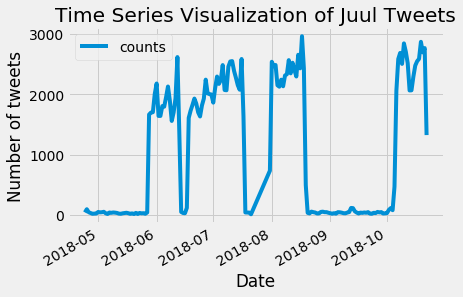

In [7]:
plt.style.use('fivethirtyeight')
ax = ts.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Number of tweets')
ax.set_title('Time Series Visualization of Juul Tweets')
plt.show()

In [8]:
ts1 = juul.groupby('tweet_created_at_date').sum()
ts1 = ts1[['retweet_count', 'favorite_count']] 
ts1

retweet_count  favorite_count
tweet_created_at_date                               
2018-04-24                      51.0           101.0
2018-04-25                      95.0           184.0
2018-04-26                      33.0           172.0
2018-04-27                      21.0            49.0
2018-04-28                      28.0            59.0
2018-04-29                      20.0            53.0
2018-04-30                      58.0            79.0
2018-05-01                      23.0            91.0
2018-05-02                      72.0           146.0
2018-05-03                      42.0           203.0
2018-05-04                      53.0           102.0
2018-05-05                       9.0            25.0
2018-05-06                       5.0            15.0
2018-05-07                      84.0           475.0
2018-05-08                       7.0            59.0
2018-05-09                      31.0           279.0
2018-05-10                      83.0           110.0
2018-05-11                      17.0            76.0
2018-05-12                       6.0            27.0
2018-05-13                      15.0            64.0
2018-05-14                      24.0            43.0
2018-05-15                      12.0            46.0
2018-05-16                       9.0            67.0
2018-05-17                      25.0            65.0
2018-05-18                       5.0            32.0
2018-05-19                      17.0            55.0
2018-05-20                       4.0            20.0
2018-05-21                      41.0            63.0
2018-05-22                       3.0            14.0
2018-05-23                      13.0            42.0
...                              ...             ...
2018-09-23                       1.0            10.0
2018-09-24                      19.0            44.0
2018-09-25                      27.0            48.0
2018-09-26                      85.0            84.0
2018-09-27                      11.0            55.0
2018-09-28                       9.0            25.0
2018-09-29                      12.0            12.0
2018-09-30                       7.0            12.0
2018-10-01                       5.0            21.0
2018-10-02                      32.0            68.0
2018-10-03                      52.0           142.0
2018-10-04                      35.0            52.0
2018-10-05                     931.0          3599.0
2018-10-06                    3552.0         18910.0
2018-10-07                    2501.0         14848.0
2018-10-08                    1833.0         13443.0
2018-10-09                    3894.0         23463.0
2018-10-10                    3350.0         21158.0
2018-10-11                    2955.0         21482.0
2018-10-12                    2845.0         22525.0
2018-10-13                    3821.0         27780.0
2018-10-14                    5592.0         36519.0
2018-10-15                    1517.0         11244.0
2018-10-16                    1607.0          9010.0
2018-10-17                    1210.0          8469.0
2018-10-18                     932.0          7896.0
2018-10-19                     944.0          8024.0
2018-10-20                    1674.0         11416.0
2018-10-21                    4490.0         32907.0
2018-10-22                     409.0          3088.0

[173 rows x 2 columns]

In [9]:
ts1.dtypes

retweet_count     float64
favorite_count    float64
dtype: object

In [10]:
import numpy as np
ts1 = ts1[['retweet_count', 'favorite_count']].astype(np.int64)
ts1.dtypes

retweet_count     int64
favorite_count    int64
dtype: object

In [11]:
ts1.head()

retweet_count  favorite_count
tweet_created_at_date                               
2018-04-24                        51             101
2018-04-25                        95             184
2018-04-26                        33             172
2018-04-27                        21              49
2018-04-28                        28              59

In [12]:
ts2 = pd.merge(ts, ts1, on='tweet_created_at_date')
ts2

counts  retweet_count  favorite_count
tweet_created_at_date                                       
2018-04-24                 39             51             101
2018-04-25                 92             95             184
2018-04-26                 42             33             172
2018-04-27                 28             21              49
2018-04-28                 16             28              59
2018-04-29                 19             20              53
2018-04-30                 20             58              79
2018-05-01                 46             23              91
2018-05-02                 40             72             146
2018-05-03                 42             42             203
2018-05-04                 49             53             102
2018-05-05                 25              9              25
2018-05-06                 13              5              15
2018-05-07                 37             84             475
2018-05-08                 32              7              59
2018-05-09                 38             31             279
2018-05-10                 35             83             110
2018-05-11                 30             17              76
2018-05-12                 19              6              27
2018-05-13                 16             15              64
2018-05-14                 24             24              43
2018-05-15                 28             12              46
2018-05-16                 33              9              67
2018-05-17                 26             25              65
2018-05-18                 15              5              32
2018-05-19                 23             17              55
2018-05-20                 12              4              20
2018-05-21                 31             41              63
2018-05-22                 13              3              14
2018-05-23                 30             13              42
...                       ...            ...             ...
2018-09-23                 16              1              10
2018-09-24                 33             19              44
2018-09-25                 28             27              48
2018-09-26                 47             85              84
2018-09-27                 39             11              55
2018-09-28                 44              9              25
2018-09-29                 21             12              12
2018-09-30                 23              7              12
2018-10-01                 27              5              21
2018-10-02                 80             32              68
2018-10-03                110             52             142
2018-10-04                 76             35              52
2018-10-05                466            931            3599
2018-10-06               2059           3552           18910
2018-10-07               2586           2501           14848
2018-10-08               2687           1833           13443
2018-10-09               2505           3894           23463
2018-10-10               2845           3350           21158
2018-10-11               2707           2955           21482
2018-10-12               2517           2845           22525
2018-10-13               2064           3821           27780
2018-10-14               2066           5592           36519
2018-10-15               2292           1517           11244
2018-10-16               2478           1607            9010
2018-10-17               2549           1210            8469
2018-10-18               2588            932            7896
2018-10-19               2871            944            8024
2018-10-20               2696           1674           11416
2018-10-21               2768           4490           32907
2018-10-22               1323            409            3088

[173 rows x 3 columns]

In [23]:
# ts2.set_index('tweet_created_at_date')

In [19]:
# ts2.plot(x='tweet_created_at_date', y=["counts", "retweet_count", "favorite_count"])

In [22]:
writer = pd.ExcelWriter('juul_timeseries.xlsx',
                        engine='xlsxwriter',
                        datetime_format='mm-dd-yyyy')
ts2.to_excel(writer,'Sheet1')
writer.save()

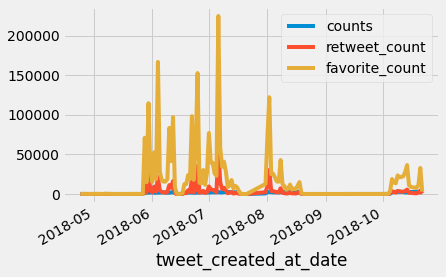

In [18]:
ts2.plot()

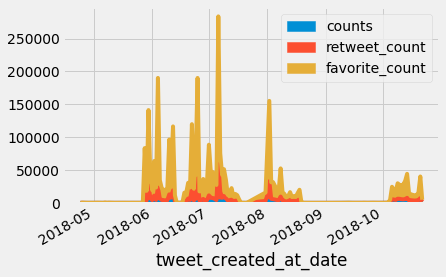

In [20]:
ts2.plot.area()